# 文書分類

前回までの自然言語処理の基礎を活かして、実際の文書分類を行うためのデータの準備を行いましょう。

## 問題設定

今回は、ニュース記事をカテゴリ分けする問題設定で考えていきます。
まずはじめに、特定フォルダ内の記事を読み込む練習をしましょう。

![](http://play.kikagaku.co.jp/wp-content/uploads/2017/07/52778a504bcc7bbfa7bb08984682c418.png)

今回はこのように９つの記事カテゴリーを文章から分類していきます。

## データの前準備

今回のデータは `data/text.zip` に置いてあります。
まずは、zipファイルを解凍する必要があります。
Jupyter Notebookでは、zipファイルなどで圧縮してからUploadする必要があるため、圧縮してUploadして解凍するといった操作を多用しますので、覚えておきましょう。

`!` を使用することで、LinuxのBashコマンドを使用することができ、こちらで`unzip`コマンドを使うことが一番楽です。

まずはファイルが格納されているか確認しましょう。

In [1]:
!ls data/

cat  dog  housing.csv  sample.png  text.zip  wine_class.csv


In [2]:
# !unzip data/text.zip

In [3]:
# ファイルを確認
!ls -a text

.   dokujo-tsushin  kaden-channel   movie-enter  smax	       topic-news
..  it-life-hack    livedoor-homme  peachy	 sports-watch


`.DS_Store`という不必要なファイルが存在するため、消しておきましょう。
圧縮のタイミングやOSによるものでいらないファイルが見つかるかもしれないため、フォルダの中などのデータをよく見ておきましょう。

In [4]:
!rm text/.DS_Store

rm: cannot remove 'text/.DS_Store': No such file or directory


In [5]:
# ファイルを確認
!ls -a text

.   dokujo-tsushin  kaden-channel   movie-enter  smax	       topic-news
..  it-life-hack    livedoor-homme  peachy	 sports-watch


このように削除できました。

## 各ディレクトリのテキスト情報を変数に読み込む

このテキスト情報を読み込むときに、便利なものが、辞書型の変数になります。

辞書型（data）のキーにファイル名、値にテキストの文字列を読み込みます。

ファイルやディレクトリを操作するときにとても便利な`glob`というライブラリもインポートしておきましょう。

In [6]:
from glob import glob

In [7]:
import pandas as pd

In [8]:
directories = glob('text/*')
directories

['text/livedoor-homme',
 'text/kaden-channel',
 'text/it-life-hack',
 'text/smax',
 'text/dokujo-tsushin',
 'text/peachy',
 'text/sports-watch',
 'text/movie-enter',
 'text/topic-news']

for文で繰り返すときに、各フォルダ（ディレクトリ）に対応する要素番号を分類に使用するラベルと設定したいため、`enumerate`を使うことで、要素番号も併せて取得しておきましょう。

In [9]:
for (i, directory) in enumerate(directories):
    print(i)
    print(directory)
    print('- - -')

0
text/livedoor-homme
- - -
1
text/kaden-channel
- - -
2
text/it-life-hack
- - -
3
text/smax
- - -
4
text/dokujo-tsushin
- - -
5
text/peachy
- - -
6
text/sports-watch
- - -
7
text/movie-enter
- - -
8
text/topic-news
- - -


In [10]:
texts, labels = [], []
for (i, directory) in enumerate(directories):
    #各ディレクトリ内のtxtファイルのパスをすべて取得
    filepaths = glob('{}/*.txt'.format(directory))
    # テキストを読み込んで、内容をtextに格納、ラベルも併せて格納
    for filepath in filepaths:
        with open(filepath, encoding='utf-8') as f:
            text = ''.join(f.readlines()[2:])  # URL等の先頭２行を除いた各行の文章を連結（join）して格納
            texts.append(text)
            labels.append(i)

たとえば、最後に格納された文書を確認してみましょう。

In [11]:
texts[0]

'ケータイで“ムラムラ”、理想の彼女とデート体験\n\u30007月24日に地上アナログ放送が終了したが、東日本大震災以降、若者のテレビ離れに拍車がかかっているという。学生から社会人になり、仕事に追われる日々の中、不在時に録画してまでテレビを観なくなったこともあるが、多様化する自分の趣味に対して、たった5つのキー局ではもはや満たされなくなってしまったのだ。テレビを観ても「つまらない」と感じるようになったのは、一体いつからなのだろうか。\n\n\u3000残業に疲れて遅くに帰宅したサラリーマンが、缶ビールを片手にテレビのリモコンをつけ、秘かに楽しみにしているのが深夜番組。仕事の状況によって毎日同じ時間に帰れるとは限らないので、番組への興味は薄いかもしれないが、「くだらないなぁ〜」などと思いつつ、不覚にも笑みを浮かべている自分に気付く。しかし、そんな深夜に人気を集めた番組ですらも、ゴールデンタイムに進出した途端、視聴率が伸びずに打ち切りになるなんていうのはよくある話だ。\n\n\u3000そんな深夜番組的な娯楽の数々を、24時間365日、外出先でも楽しむことができる放送局が、今や手放すことのできないケータイ電話の中にある。月額わずか315円（税込）でドラマやバラエティ、2万曲以上あるミュージックビデオまで好きなだけ楽しめるケータイ専用放送局「BeeTV」だ。開局から2年ほどで、すでに120万人超が入会。BeeTVを見るのに必要なものは、NTTドコモのケータイだけ。1週間無料で見放題なので、まずは番組を見てから入会を判断すればいいわけだ。\n\n\u3000BeeTVへのアクセス方法は、ケータイの「i」ボタンを押し、iメニューから「動画」を選択すると、ドコモ動画ページ内にBeeTVのオススメ番組が紹介されている。まずは、BeeTVのトップページに行き、見たい番組を探してみよう。「ジャンル」「こんな時に」「オススメ」など数字ボタンと同じ配列の9個のメニューが並ぶ中で、「こんな時に」を押してみた。すると今度は「姫キュン」「ダム泣き」「ドカ晴れ」などのメニューが現れたので、「男ですもの。ためこむ前にムラムラしよう。」との説明が流れる「ムラムラ」を思わず押してしまった。\n\n\u3000帰宅途中ということもあり、周囲の人目を気にして「欲望」「美少女」「浮気がバレない最強テクニッ

In [12]:
labels[0]

0

## 文章から名詞のみを抽出

前に作成した名詞抽出用の関数を使用して、文書全体で使用されている名詞を全てword_collectというリストに格納していきましょう。

In [13]:
import MeCab

In [14]:
mecab = MeCab.Tagger('-Ochasen')

In [15]:
def get_nouns(text):
    nouns = []
    res = mecab.parse(text)
    words = res.split('\n')[:-2] #EOSと空白部分の削除
    for word in words:
        part = word.split('\t')
        if '名詞' in part[3]:
            nouns.append(part[0])
    return nouns

In [16]:
word_collect = []
for text in texts:
    nouns = get_nouns(text)
    word_collect.append(nouns)
    
# ワンライナーで下記のように書いてもOK
# word_collect = [ get_nouns(text) for text in texts ]

## BoWに変換

前回と同様に`gensim`を使いましょう。

In [17]:
from gensim import corpora, matutils

Using TensorFlow backend.


まずはBoW用の辞書を作りましょう。

In [18]:
dictionary = corpora.Dictionary(word_collect)

In [19]:
len(dictionary)

86471

今回は`86471`単語あるようです。

このままでも良いのですが、出現回数が多すぎたり引きすぎる単語をフィルタリングすると、特徴のある単語のみに絞ることができます。

In [20]:
dictionary.filter_extremes(no_below=20)

In [21]:
len(dictionary)

7494

このように全体で20回以上出現しない単語はフィルタリングすることで、`7494`単語に抑えることができました。
辞書作成に多少時間がかかるため、あとから使えるようにこの段階で保存しておくと良いでしょう。

In [22]:
# 後から使えるように保存しておく
dictionary.save_as_text('livedoordic.txt')

それではこの作成した辞書を使って、BoWに変換しましょう。

In [23]:
n_words = len(dictionary)

In [24]:
# BOWによる特徴ベクトルの作成
x = []
for nouns in word_collect:
    bow_id = dictionary.doc2bow(nouns)
    bow = matutils.corpus2dense([bow_id], n_words).T[0]
    x.append(bow)

In [25]:
import numpy as np

In [26]:
x = np.array(x, 'f')
t = np.array(labels, 'f')

In [27]:
x.shape

(7376, 7494)

In [28]:
t.shape

(7376,)

こちらのように機械学習で使用できる形式へ変換できました。
あとは、単純な分類問題であるため、NNでクラス分類することで実装できます。

## 演習課題

得られたデータセットを使用してクラス分類を行うNNのモデルを作成せよ。

条件

- seedは0で固定
- 全体の70%が訓練データ、残りの30%が検証データ（ランダムに分割）

In [29]:
import keras
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization,  Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [30]:
# 行列として入力するための加工
num_classes = 9
t = to_categorical(t, num_classes)

In [31]:
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7,  test_size=0.3, random_state=0)

In [32]:
# シードの固定
np.random.seed(0)

model = Sequential()

model.add(Dense(200, input_shape=(7494, ), activation='relu'))
model.add(Dense(9, activation='softmax'))

optimizer = keras.optimizers.SGD(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
history = model.fit(train_x, train_t,
          batch_size=100,
          epochs=50,
          verbose=1,
          validation_data=(val_x, val_t))

Train on 5163 samples, validate on 2213 samples
Epoch 1/50
5163/5163 [==============================] - 1s 219us/step - loss: 1.8607 - acc: 0.4075 - val_loss: 1.5704 - val_acc: 0.6209
Epoch 2/50
5163/5163 [==============================] - 0s 69us/step - loss: 1.3616 - acc: 0.7182 - val_loss: 1.2173 - val_acc: 0.7741
Epoch 3/50
5163/5163 [==============================] - 0s 70us/step - loss: 1.0650 - acc: 0.8274 - val_loss: 0.9863 - val_acc: 0.8378
Epoch 4/50
5163/5163 [==============================] - 0s 72us/step - loss: 0.8659 - acc: 0.8687 - val_loss: 0.8292 - val_acc: 0.8604
Epoch 5/50
5163/5163 [==============================] - 0s 71us/step - loss: 0.7256 - acc: 0.8923 - val_loss: 0.7189 - val_acc: 0.8735
Epoch 6/50
5163/5163 [==============================] - 0s 69us/step - loss: 0.6232 - acc: 0.9068 - val_loss: 0.6393 - val_acc: 0.8875
Epoch 7/50
5163/5163 [==============================] - 0s 69us/step - loss: 0.5455 - acc: 0.9144 - val_loss: 0.5788 - val_acc: 0.8906
Epoch 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

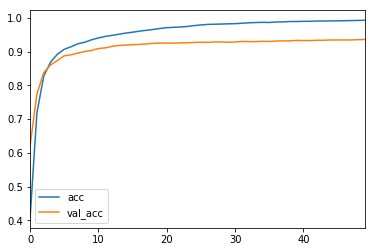

In [35]:
# 学習結果をPandasのDataFrame型で読み込みます。
results = pd.DataFrame(history.history)

# accuracy（精度）を表示
results[['acc', 'val_acc']].plot()

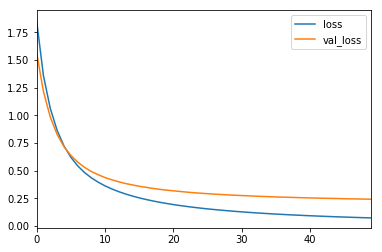

In [36]:
# loss（損失関数）を表示
results[['loss', 'val_loss']].plot()